In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv("advertising.csv")
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
sales.shape

(200, 4)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
sales.select_dtypes("object").columns

Index([], dtype='object')

In [7]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


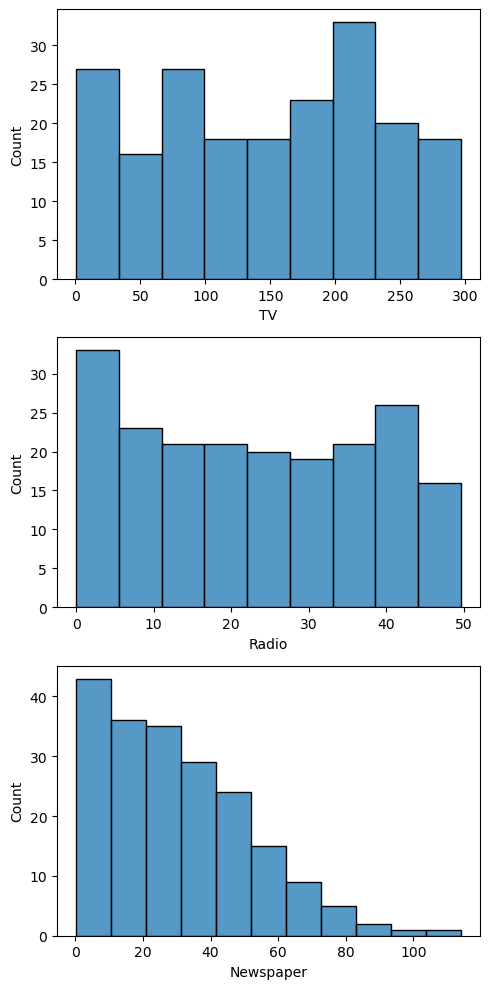

In [8]:
#Univariate Analysis
fig, axs = plt.subplots(3, figsize = (5,10))
plt1=sns.histplot(sales["TV"],ax = axs[0])
plt2=sns.histplot(sales["Radio"],ax = axs[1])
plt3=sns.histplot(sales["Newspaper"],ax = axs[2])
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

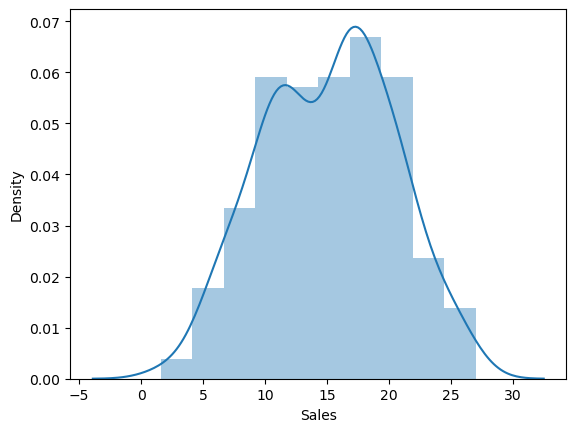

In [9]:
sns.distplot(sales["Sales"])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

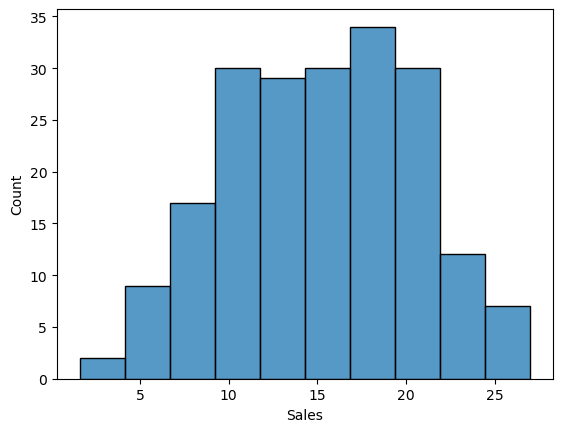

In [10]:
sns.histplot(sales["Sales"])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

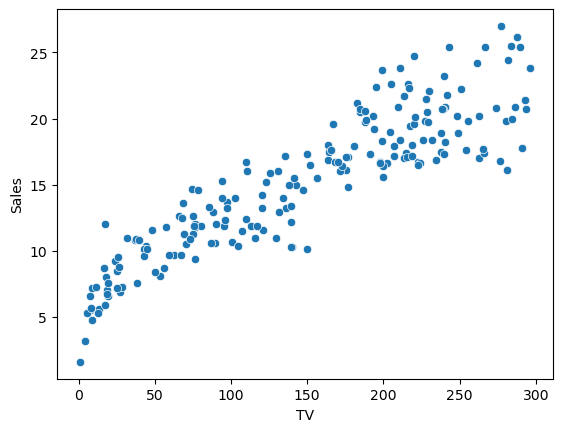

In [11]:
#Bivariate Analysis
sns.scatterplot(data=sales,x="TV",y="Sales")

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

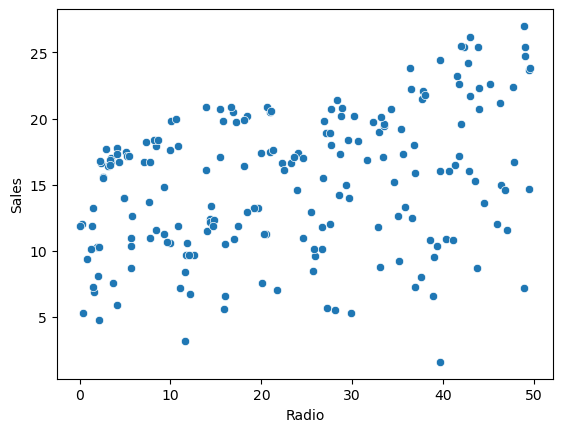

In [12]:
sns.scatterplot(data=sales,x="Radio",y="Sales")

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

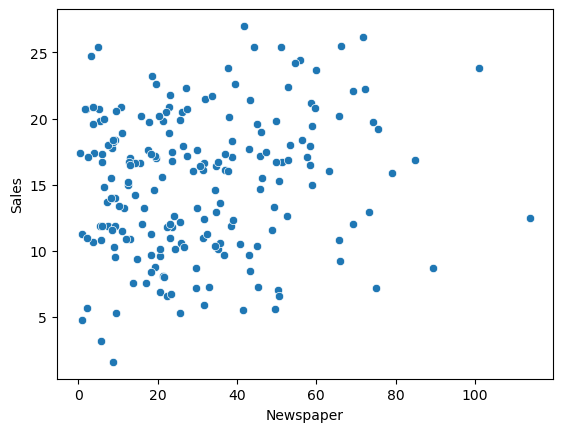

In [13]:
sns.scatterplot(data=sales,x="Newspaper",y="Sales")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


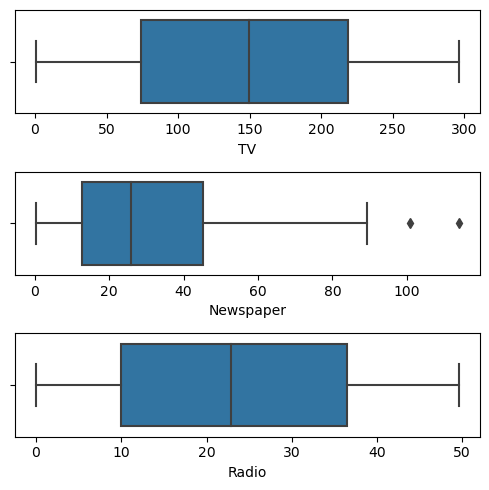

In [14]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales['TV'], ax = axs[0])
plt2 = sns.boxplot(sales['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales['Radio'], ax = axs[2])
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

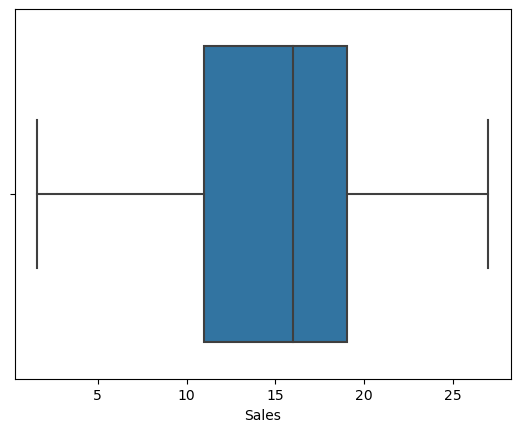

In [15]:
#Exploratory Data Analysis
sns.boxplot(sales.Sales)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


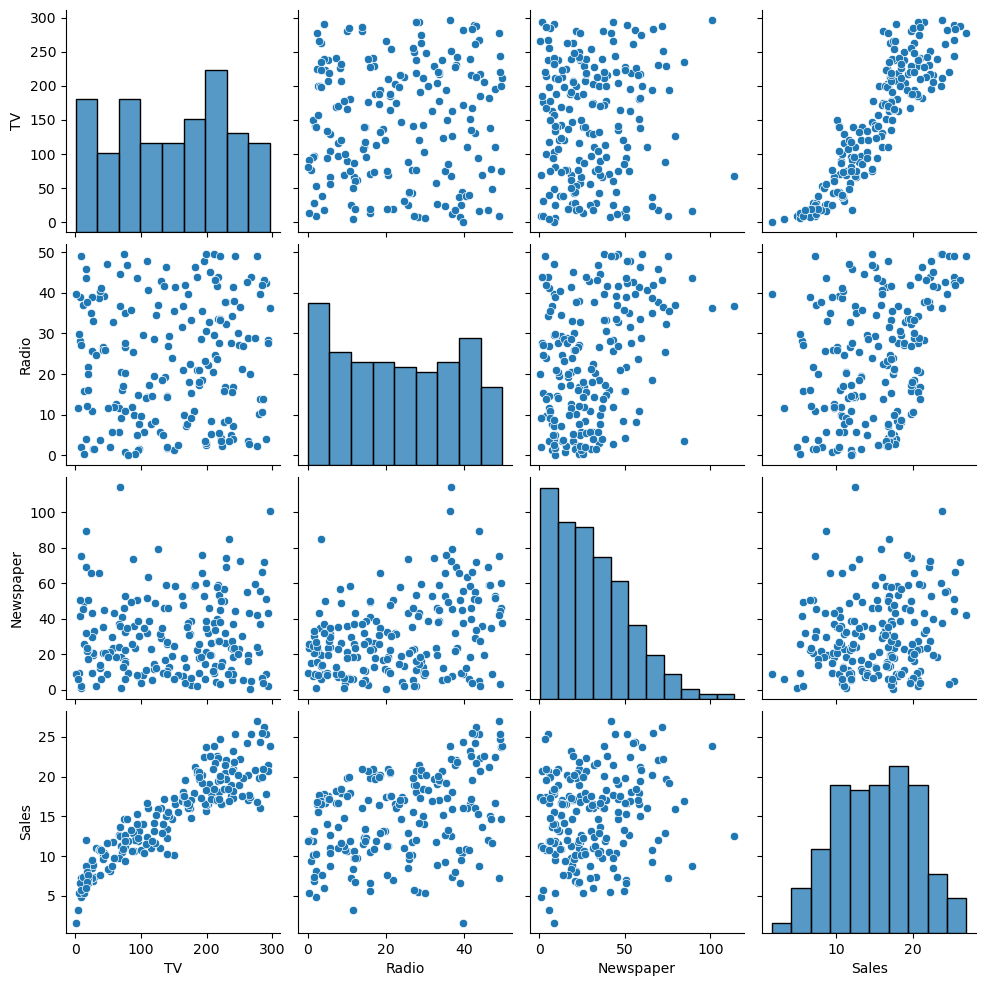

In [16]:
sns.pairplot(sales, size=2.5)
plt.show()

In [17]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

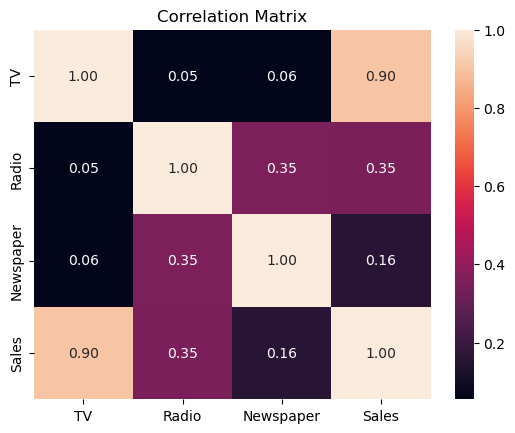

In [18]:
sns.heatmap(sales.corr(),annot=True,fmt=".2f")
plt.title('Correlation Matrix')

In [19]:
x=sales.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
y=sales.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x1,y1)

LinearRegression()

In [23]:
lr_model.score(x2,y2)*100

90.59011844150827

In [24]:
lr_model.intercept_

4.714126402214134

In [25]:
lr_model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [26]:
yp=lr_model.predict(x2)
yp[:5]

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879])

In [27]:
x2[:5]

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [28]:
y2[:5]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

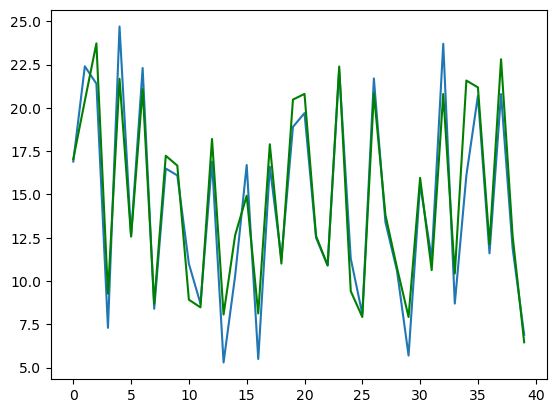

In [29]:
plt.plot(range(0,len(x2)),y2)
plt.plot(range(0,len(x2)),yp,color='green')
plt.show()

In [30]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y2, yp)))

1.7052146229349228


In [31]:
from sklearn.metrics import r2_score
r2_score(y2,yp)

0.9059011844150826

In [32]:
import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.13e-99
Time:                        22:39:08   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0